# Files & imports

In [145]:
from pandas import read_csv, DataFrame
import pandas as pd
from functools import reduce
import os
print(os.getcwd())

/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales


In [146]:
%run 'scripts/dslabs_functions.py'


In [147]:
## https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

holidays = pd.read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/holidays_events.csv") 
oil = pd.read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/oil.csv")
stores = pd.read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/stores.csv")
transactions = pd.read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/transactions.csv")

test_df = pd.read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/test.csv")

merged_df = pd.read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/train.csv")

file_tag = "Ecuadorian Store Sales"


In [148]:
holidays.info()
holidays['date'] = pd.to_datetime(holidays['date'])
holidays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [149]:
oil.info()
oil['date'] = pd.to_datetime(oil['date'])
oil.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [150]:
stores.info()
stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [151]:
transactions.info()
transactions['date'] = pd.to_datetime(transactions['date'])
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [152]:
#merged_df.info()
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [153]:
#test_df.info()
test_df['date'] = pd.to_datetime(test_df['date'])
test_df.head()


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


## merge

In [154]:
dfs = [train_df, holidays, oil, transactions]
merged_df = reduce(lambda left, right: 
                   pd.merge(left, right, on='date'), dfs)

In [155]:
merged_df.head()

,id,date,store_nbr_x,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico,store_nbr_y,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,25,770
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,25,770
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,25,770
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,25,770
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,25,770


In [156]:
merged_df.rename(columns={'store_nbr_y': 'store_nbr_transaction'}, inplace=True)

merged_df.rename(columns={'store_nbr_x': 'store_nbr'}, inplace=True)
merged_df = pd.merge(merged_df, stores, on='store_nbr', how='inner', suffixes=('_df1', '_store'))


In [157]:
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,type_df1,locale,locale_name,description,transferred,dcoilwtico,store_nbr_y,transactions,city,state,type_store,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,25,770,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,25,770,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,25,770,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,25,770,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,25,770,Quito,Pichincha,D,13


# Dimensionality

In [165]:
from matplotlib.pyplot import figure, savefig, show
from pandas import read_csv, DataFrame
import pandas as pd


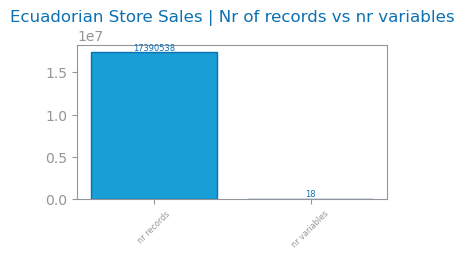

In [166]:
figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": merged_df.shape[0], "nr variables": merged_df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=f"{file_tag} | Nr of records vs nr variables"
)
savefig(f"{file_tag}_records_variables.png") #save for later step
show()

## Missing values


Variables with their respective percentages of missing values:
dcoilwtico: 6.84%


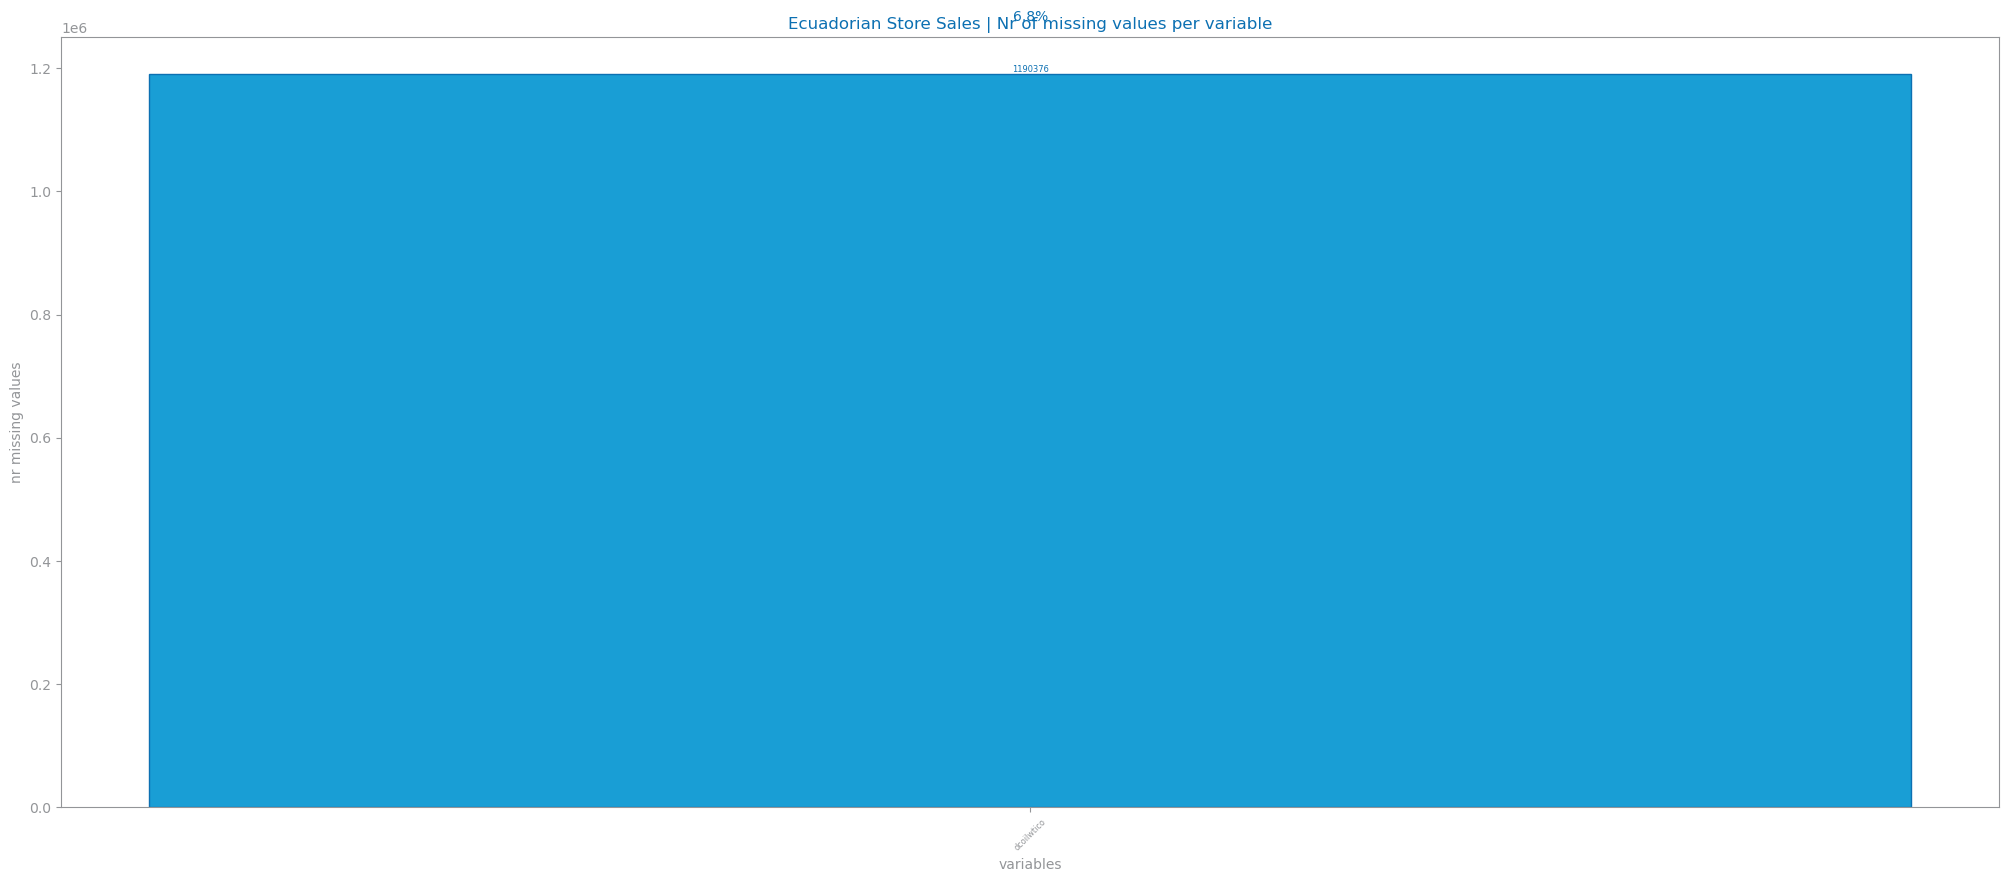

In [167]:
mv: dict[str, int] = {}
total_rows = len(merged_df)

# Calculate the number of missing values and percentage for each variable
for var in merged_df.columns:
    nr: int = merged_df[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

# Sort the dictionary by the number of missing values in descending order
sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

# Print the list of variables with their respective percentages of missing values
print("Variables with their respective percentages of missing values:")
for var, perc in zip(variables, percentages):
    print(f"{var}: {perc:.2f}%")

# Plotting the bar chart
figure(figsize=(25, 10))  # (width, height)

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} | Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)

# Annotate the bars with percentages
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

# Display the chart
show()

## Variables types

In [168]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
        # Check if the column is already of datetime type
            if pd.api.types.is_datetime64_any_dtype(df[c]):
                variable_types["date"].append(c)
            else:
                try:
                    to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

{'numeric': ['id', 'store_nbr', 'sales', 'onpromotion', 'dcoilwtico', 'store_nbr_y', 'transactions', 'cluster'], 'binary': ['transferred'], 'date': ['date'], 'symbolic': ['family', 'type_df1', 'locale', 'locale_name', 'description', 'city', 'state', 'type_store']}


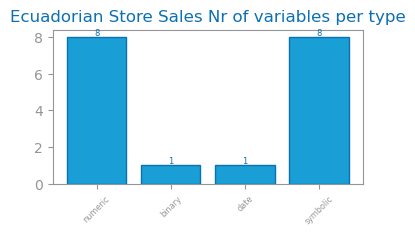

In [169]:
variable_types: dict[str, list] = get_variable_types(merged_df)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title=f"{file_tag} Nr of variables per type"
)
savefig(f"./{file_tag}_variable_types.png") 
show()

## Plots

In [170]:
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots
from matplotlib.figure import Figure


def plot_ts_multivariate_chart(data: DataFrame, title: str) -> list[Axes]:
    fig: Figure
    axs: list[Axes]
    fig, axs = subplots(data.shape[1], 1, figsize=(3 * HEIGHT, HEIGHT / 2 * data.shape[1]))
    fig.suptitle(title)

    for i in range(data.shape[1]):
        col: str = data.columns[i]
        plot_line_chart(
            data[col].index.to_list(),
            data[col].to_list(),
            ax=axs[i],
            xlabel=data.index.name,
            ylabel=col,
        )
    return axs

Nr. Records =  (3000888, 5)
First timestamp 2013-01-01 00:00:00
Last timestamp 2017-08-15 00:00:00


TypeError: '<' not supported between instances of 'str' and 'int'

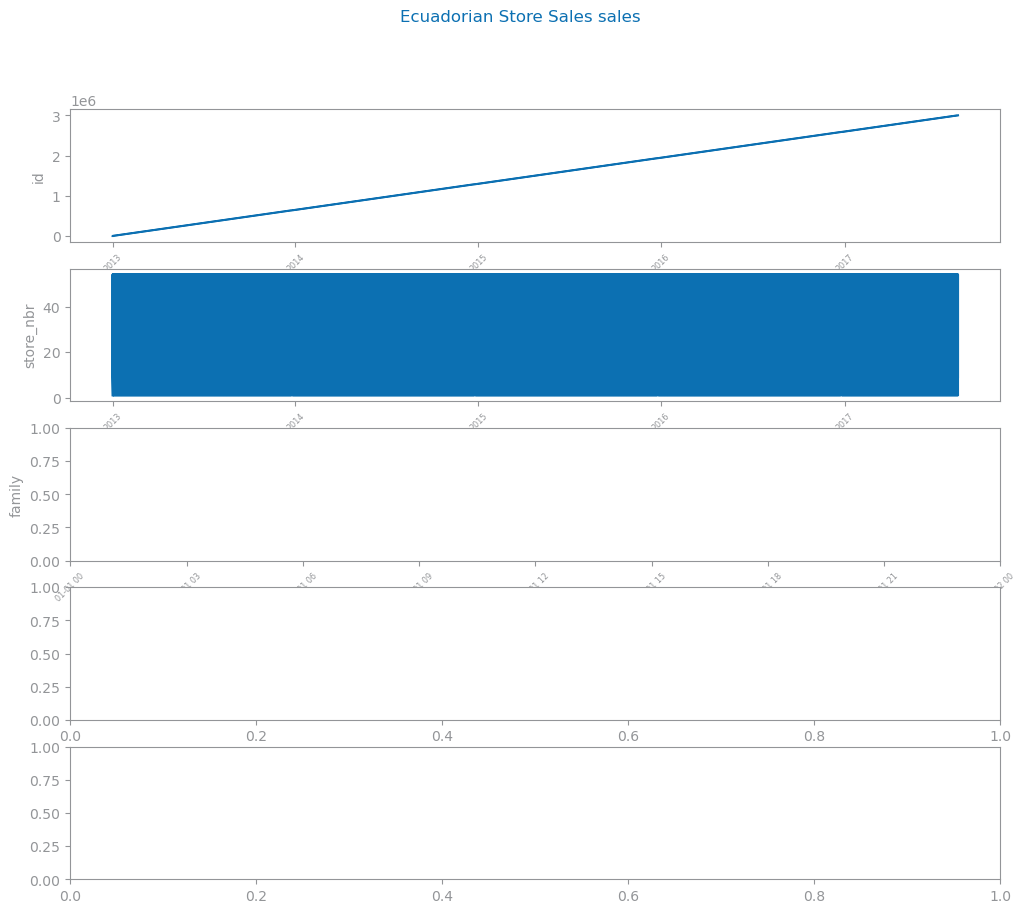

In [171]:
target = "sales"
data: DataFrame = read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/train.csv",
    index_col="date",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
print("Nr. Records = ", data.shape)
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])

plot_ts_multivariate_chart(data, title=f"{file_tag} {target}")
show()

# Granularity

## Dates

In [172]:
from pandas import DataFrame
#ver para weekend, dia da semana (mon, tue, thu), hora, minuto. estudar a granularidade destas variaveis.
#variáveis ciclicas.

def derive_date_variables(merged_df: DataFrame, date_vars: list[str]) -> DataFrame:
    for date in date_vars:
        merged_df[date + "_year"] = merged_df[date].dt.year
        merged_df[date + "_quarter"] = merged_df[date].dt.quarter
        merged_df[date + "_month"] = merged_df[date].dt.month
        merged_df[date + "_day"] = merged_df[date].dt.day
    return merged_df

In [173]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
        # Check if the column is already of datetime type
            if pd.api.types.is_datetime64_any_dtype(df[c]):
                variable_types["date"].append(c)
            else:
                try:
                    to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

In [174]:
from numpy import ndarray
from pandas import Series, read_csv
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots, savefig, show
#from dslabs_functions import plot_bar_chart, HEIGHT
#get_variable_types

def analyse_date_granularity(merged_df: DataFrame, var: str, levels: list[str]) -> ndarray:
    cols: int = len(levels)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"{file_tag} | Granularity study for {var}")

    for i in range(cols):
        counts: Series[int] = merged_df[var + "_" + levels[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=levels[i],
            xlabel=levels[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs


merged_df: DataFrame = read_csv(
    merged_df, index_col=None, parse_dates=True, dayfirst=True
)
variables_types: dict[str, list] = get_variable_types(merged_df)
merged_df_ext: DataFrame = derive_date_variables(merged_df, variables_types["date"])

for v_date in variables_types["date"]:
    analyse_date_granularity(merged_df, v_date, ["year", "quarter", "month", "day"])
    savefig(f"./{file_tag}_granularity_{v_date}.png")
    show()

TypeError: argument of type 'method' is not iterable

# Time series analysis

In [175]:
import matplotlib.pyplot as plt
# For time series analysis, it's often useful to set the date column as the DataFrame index
merged_df.set_index('date', inplace=True)

## Daily

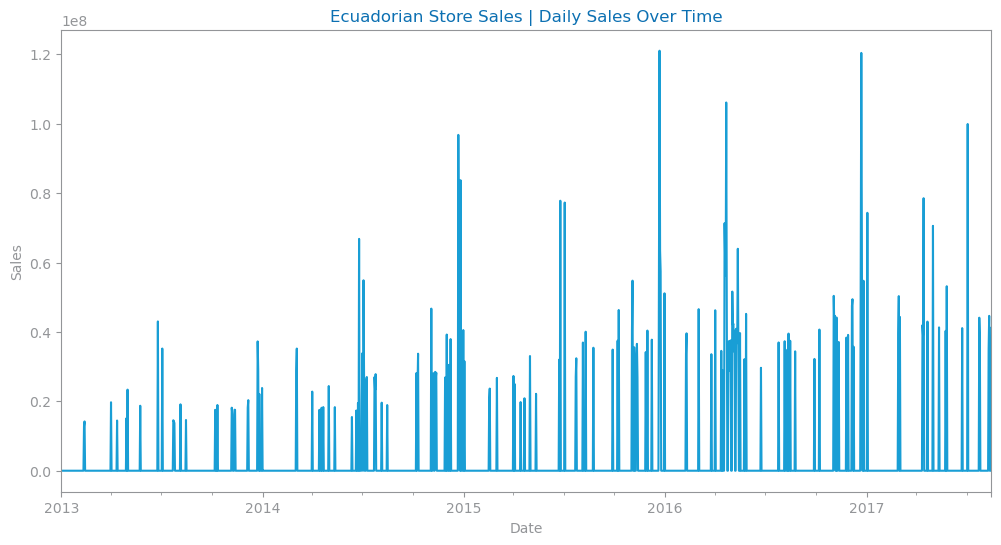

In [176]:
daily_sales = merged_df['sales'].resample('D').sum()
plt.figure(figsize=(12, 6))
daily_sales.plot(title=f"{file_tag} | Daily Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

## Monthly

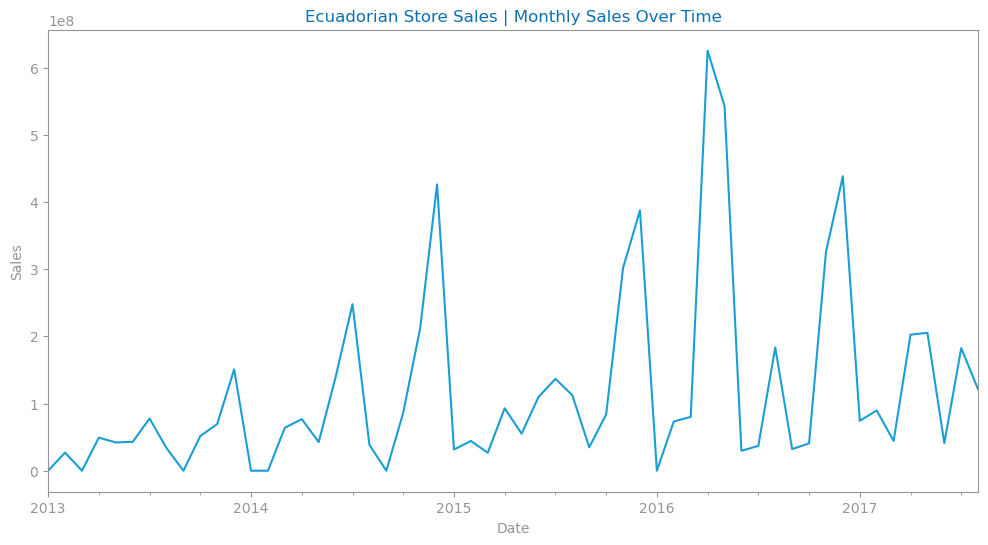

In [177]:
monthly_sales = merged_df['sales'].resample('M').sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(title=f"{file_tag} | Monthly Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

## Yearly

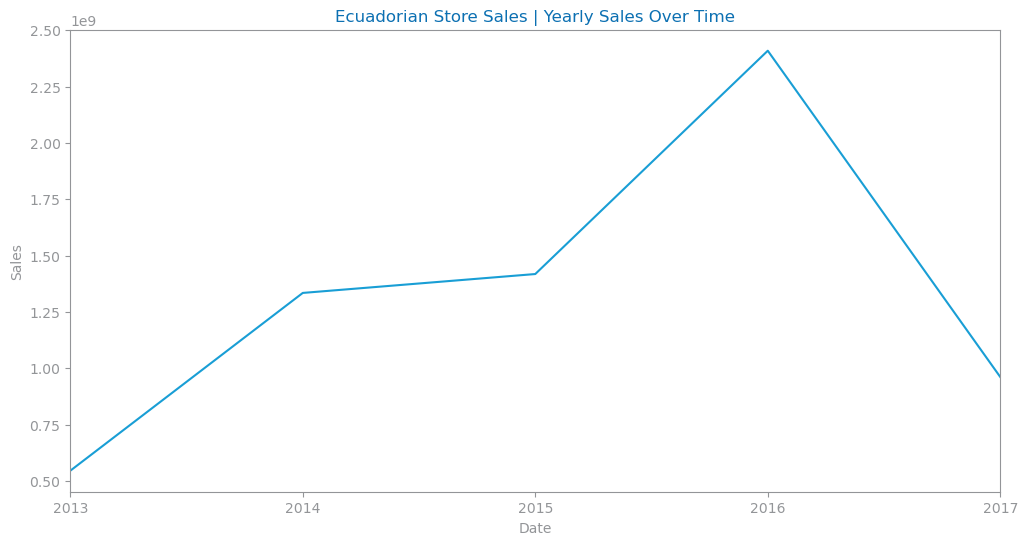

In [178]:
yearly_sales = merged_df['sales'].resample('Y').sum()
plt.figure(figsize=(12, 6))
yearly_sales.plot(title=f"{file_tag} | Yearly Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Save df from preprocessing into a csv file

In [180]:
from pandas import read_csv, DataFrame
import pandas as pd
#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase

holidays = r"/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/df_preproc_holidays.csv"
oil = r"/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/df_preproc_oil.csv"
stores = r"/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/df_preproc_stores.csv"
transactions = r"/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/df_preproc_transactions.csv"

test_df = r"/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/df_preproc_test.csv"

merged_df = r"/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/df_preproc_train.csv"


file_tag = "Ecuadorian Store Sales"

holidays = pd.read_csv(holidays)
oil = pd.read_csv(oil)
stores = pd.read_csv(stores)
transactions = pd.read_csv(transactions)

test_df = pd.read_csv(test_df)
merged_df = pd.read_csv(merged_df)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/df_preproc_holidays.csv'